# RETFound EVALUATION

“RETFound”: https://huggingface.co/YukunZhou/RETFound_mae_natureCFP and https://github.com/rmaphoh/RETFound

The big part of code in main_finetune.py, extract_f_p_RETFound_noise.py, extract_f_p_RETFound.py is inspired by: https://github.com/msayhan/ICL-Ophthalmology-Public

LLM Disclaimer: Debugging was done with the help of ChatGPT: https://chatgpt.com/ 

In [1]:
import os
import pandas as pd
import logging
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
    balanced_accuracy_score
)
from sklearn.preprocessing import normalize
from sklearn.neighbors import NearestNeighbors
import shutil
import math

# Load Data

In [1]:
#brazilian_dataset = pd.read_csv("metadata_dataset.csv")
#brazilian_dataset['feature_combination'] = (brazilian_dataset['camera'].astype(str) + " " + brazilian_dataset['patient_sex'].astype(str) + " " + brazilian_dataset['DR_SDRG'].astype(str) + " " + brazilian_dataset['DR_ICDR'].astype(str) + " " + brazilian_dataset['age_group'].astype(str) + " "+ brazilian_dataset['diabetic_retinopathy'].astype(str))

In [2]:
#with open('folds.pkl','rb') as f:
    #folds = pickle.load(f)

In [3]:
#folds_with_validation = []

#for i, (fold_train_i_BD, fold_test_i_BD) in enumerate (folds):
    #train_rows_folds_BD = brazilian_dataset.iloc[fold_train_i_BD]
    #test_rows_folds_BD = brazilian_dataset.iloc[fold_test_i_BD]

    #X = train_rows_folds_BD[['camera', 'patient_sex', 'DR_SDRG', 'DR_ICDR', 'age_group', 'diabetic_retinopathy']]
    #y = train_rows_folds_BD['feature_combination']
    #skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    #skf.get_n_splits(X, y)
    #for fold_train_i_not_LLM, fold_val_i_not_LLM in skf.split(X, y):
        #rows_train_i_not_LLM = train_rows_folds_BD.iloc[fold_train_i_not_LLM]
        #rows_val_i_not_LLM = train_rows_folds_BD.iloc[fold_val_i_not_LLM]
        #break
    #fold_with_val = {
        #"train" : rows_train_i_not_LLM,
        #"val" : rows_val_i_not_LLM,
        #"test" : test_rows_folds_BD 
    #}
    #folds_with_validation.append(fold_with_val)

In [4]:
#with open('folds_with_validation.pkl','wb') as f:
    #pickle.dump(folds_with_validation, f)

# Prepare folders with images for RETFound

In [6]:
#target_folder_0_1 = "RETFound/BD_train_val_test_0_1"
#for i, fold in enumerate (folds_with_validation):
    #for set_tvt in ["train", "val", "test"]:
        #set_df = fold[set_tvt]
        #for _, row in set_df.iterrows():
            #img_path = row['full_path']
            #label_class = str(row['diabetic_retinopathy'])
            #target_dir = os.path.join(target_folder_0_1, f"fold{i}", set_tvt, label_class)
            #os.makedirs(target_dir, exist_ok=True)
            #target_path = os.path.join(target_dir, os.path.basename(img_path))
            #shutil.copy2(img_path, target_path)

In [7]:
#target_folder_0_4 = "RETFound/BD_train_val_test_0_4"
#for i, fold in enumerate (folds_with_validation):
    #for set_tvt in ["train", "val", "test"]:
        #set_df = fold[set_tvt]
        #for _, row in set_df.iterrows():
            #img_path = row['full_path']
            #label_class = str(row['DR_ICDR'])
            #target_dir = os.path.join(target_folder_0_4, f"fold{i}", set_tvt, label_class)
            #os.makedirs(target_dir, exist_ok=True)
            #target_path = os.path.join(target_dir, os.path.basename(img_path))
            #shutil.copy2(img_path, target_path)

# Load mini Data

In [5]:
#mini_brazilian_dataset = pd.read_csv("mini_brazilian_dataset.csv")
#mini_brazilian_dataset['feature_combination'] = (mini_brazilian_dataset['camera'].astype(str) + " " + mini_brazilian_dataset['patient_sex'].astype(str) + " " + mini_brazilian_dataset['DR_SDRG'].astype(str) + " " + mini_brazilian_dataset['DR_ICDR'].astype(str) + " " + mini_brazilian_dataset['age_group'].astype(str) + " "+ mini_brazilian_dataset['diabetic_retinopathy'].astype(str))

In [6]:
#X_mini = mini_brazilian_dataset[['camera', 'patient_sex', 'DR_SDRG', 'DR_ICDR', 'age_group', 'diabetic_retinopathy']]
#y_mini = mini_brazilian_dataset['feature_combination']
#skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
#skf.get_n_splits(X_mini, y_mini)

In [7]:
#folds_mini = []
#for fold_train_index_mini, fold_test_index_mini in skf.split(X_mini, y_mini):
    #folds_mini.append((fold_train_index_mini, fold_test_index_mini))
#print(folds)
#with open('folds_mini.pkl','wb') as f:
    #pickle.dump(folds_mini, f)

In [8]:
#folds_with_validation_mini = []

#for i, (fold_train_i_BD_mini, fold_test_i_BD_mini) in enumerate (folds_mini):
    #train_rows_folds_BD_mini = mini_brazilian_dataset.iloc[fold_train_i_BD_mini]
    #test_rows_folds_BD_mini = mini_brazilian_dataset.iloc[fold_test_i_BD_mini]

    #X = train_rows_folds_BD_mini[['camera', 'patient_sex', 'DR_SDRG', 'DR_ICDR', 'age_group', 'diabetic_retinopathy']]
    #y = train_rows_folds_BD_mini['feature_combination']
    #skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    #skf.get_n_splits(X, y)
    #for fold_train_i_not_LLM_mini, fold_val_i_not_LLM_mini in skf.split(X, y):
        #rows_train_i_not_LLM_mini = train_rows_folds_BD_mini.iloc[fold_train_i_not_LLM_mini]
        #rows_val_i_not_LLM_mini = train_rows_folds_BD_mini.iloc[fold_val_i_not_LLM_mini]
        #break
    #fold_with_val_mini = {
        #"train" : rows_train_i_not_LLM_mini,
        #"val" : rows_val_i_not_LLM_mini,
        #"test" : test_rows_folds_BD_mini 
    #}
    #folds_with_validation_mini.append(fold_with_val_mini)

In [9]:
#with open('folds_with_validation_mini.pkl','wb') as f:
    #pickle.dump(folds_with_validation_mini, f)

# Prepare folders with images from mini Data set for RETFound

In [13]:
#target_folder_0_1_mini = "RETFound/mini_BD_tvt_01"
#for i, fold in enumerate (folds_with_validation_mini):
    #for set_tvt in ["train", "val", "test"]:
        #set_df = fold[set_tvt]
        #for _, row in set_df.iterrows():
            #img_path = row['full_path']
            #label_class = str(row['diabetic_retinopathy'])
            #target_dir = os.path.join(target_folder_0_1_mini, f"fold{i}", set_tvt, label_class)
            #os.makedirs(target_dir, exist_ok=True)
            #target_path = os.path.join(target_dir, os.path.basename(img_path))
            #shutil.copy2(img_path, target_path)

In [14]:
#target_folder_0_4_mini = "RETFound/mini_BD_tvt_04"
#for i, fold in enumerate (folds_with_validation_mini):
    #for set_tvt in ["train", "val", "test"]:
        #set_df = fold[set_tvt]
        #for _, row in set_df.iterrows():
            #img_path = row['full_path']
            #label_class = str(row['DR_ICDR'])
            #target_dir = os.path.join(target_folder_0_4_mini, f"fold{i}", set_tvt, label_class)
            #os.makedirs(target_dir, exist_ok=True)
            #target_path = os.path.join(target_dir, os.path.basename(img_path))
            #shutil.copy2(img_path, target_path)

# Load MESSIDOR Data

In [10]:
#messidor_dataset = pd.read_csv("metadata_messidor_dataset.csv")

In [11]:
#with open('folds_messidor.pkl','rb') as f:
    #folds_messidor = pickle.load(f)

In [12]:
#folds_messidor_with_validation = []

#for i, (fold_train_i_M, fold_test_i_M) in enumerate (folds_messidor):
    #train_rows_folds_M = messidor_dataset.iloc[fold_train_i_M]
    #test_rows_folds_M = messidor_dataset.iloc[fold_test_i_M]

    #X = train_rows_folds_M[['image_id', 'full_path']]
    #y = train_rows_folds_M['adjudicated_dr_grade']
    #skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    #skf.get_n_splits(X, y)
    #for fold_train_i_not_LLM, fold_val_i_not_LLM in skf.split(X, y):
        #rows_train_i_not_LLM = train_rows_folds_M.iloc[fold_train_i_not_LLM]
        #rows_val_i_not_LLM = train_rows_folds_M.iloc[fold_val_i_not_LLM]
        #break
    #fold_with_val = {
        #"train" : rows_train_i_not_LLM,
        #"val" : rows_val_i_not_LLM,
        #"test" : test_rows_folds_M 
    #}
    #folds_messidor_with_validation.append(fold_with_val)

In [13]:
#with open('folds_messidor_with_validation.pkl','wb') as f:
    #pickle.dump(folds_messidor_with_validation, f)

In [14]:
#with open("RF_folds_BD_mini_01_val_BD_mini.pkl", "wb") as f:
    #pickle.dump(folds_BD_mini_01_val_BD_mini, f)

# Prepare folders with images from MESSIDOR Data set for RETFound

In [19]:
#target_folder_0_1_messidor = "RETFound/messidor_tvt_01"
#for i, fold in enumerate (folds_messidor_with_validation):
    #for set_tvt in ["train", "val", "test"]:
        #set_df = fold[set_tvt]
        #for _, row in set_df.iterrows():
            #img_path = row['full_path']
            #label_class = 0 if float(row['adjudicated_dr_grade']) == 0.0 else 1
            #label_class = str(label_class)
            #target_dir = os.path.join(target_folder_0_1_messidor, f"fold{i}", set_tvt, label_class)
            #os.makedirs(target_dir, exist_ok=True)
            #target_path = os.path.join(target_dir, os.path.basename(img_path))
            #shutil.copy2(img_path, target_path)

In [20]:
#target_folder_0_4_messidor = "RETFound/messidor_tvt_04"
#for i, fold in enumerate (folds_messidor_with_validation):
    #for set_tvt in ["train", "val", "test"]:
        #set_df = fold[set_tvt]
        #for _, row in set_df.iterrows():
            #img_path = row['full_path']
            #label_class = str(row['adjudicated_dr_grade'])
            #target_dir = os.path.join(target_folder_0_4_messidor, f"fold{i}", set_tvt, label_class)
            #os.makedirs(target_dir, exist_ok=True)
            #target_path = os.path.join(target_dir, os.path.basename(img_path))
            #shutil.copy2(img_path, target_path)

# FINE-TUNING

see folder retfound_ft_and_ev

In [21]:
# nohup bash ft_ev_0_1_RF_mao.sh > RETFound_01_full_BD.log 2>&1 & 

In [22]:
# nohup bash ft_ev_0_1_RF_mao_mini.sh > RETFound_01_mini_BD.log 2>&1 & 

In [23]:
# nohup bash ft_ev_0_4_RF_mao.sh > RETFound_04_full_BD.log 2>&1 &
# nohup bash ft_ev_0_4_RF_mao_mini.sh > RETFound_04_mini_BD.log 2>&1 & 
# nohup bash ft_ev_0_1_RF_mao_MES.sh > RETFound_01_ft_MES.log 2>&1 & 
# nohup bash ft_ev_0_4_RF_mao_MES.sh > RETFound_04_ft_MES.log 2>&1 &

# EVALUATION FINE-TUNED MODELS

In [24]:
# nohup bash ev_0_4_RF_mao_mini.sh > ev_RETFound_04_mini_BD_val_BD.log 2>&1 & 
# nohup bash ev_0_4_RF_mao_mini_val_messidor.sh > ev_RETFound_04_mini_BD_val_messidor.log 2>&1 & 

# nohup bash ev_0_1_RF_mao.sh > ev_RETFound_01_BD_val_BD.log 2>&1 & DONE!
# nohup bash ev_0_1_RF_mao_val_messidor.sh > ev_RETFound_01_BD_val_messidor.log 2>&1 & 

# nohup bash ev_0_1_RF_mao_BD_mini_val_BD_mini.sh > RETFound_01_ev_BD_mini_val_BD_mini.log 2>&1 
# nohup bash ev_0_1_RF_mao_BD_mini_val_MES.sh > RETFound_01_ev_BD_mini_val_MES.log 2>&1 & 

# nohup bash ev_0_1_RF_mao_MES_val_BD_mini.sh > RETFound_01_ev_MES_val_BD_mini.log 2>&1 & 
# nohup bash ev_0_1_RF_mao_MES_val_MES.sh > RETFound_01_ev_MES_val_MES.log 2>&1 & 

# nohup bash ev_0_4_RF_mao_MES_val_BD_mini.sh > RETFound_04_ev_MES_val_BD_mini.log 2>&1 & 
# nohup bash ev_0_4_RF_mao_MES_val_MES.sh > RETFound_04_ev_MES_val_MES.log 2>&1 & 

# EVALUATION FINE-TUNED MODELS + NOISE (S, M, L)

In [25]:
# nohup bash ev_0_1_RF_mao_BD_mini_val_BD_mini_NOISE_SMALL.sh > RETFound_01_ev_BD_mini_val_BD_mini_NOISE_SMALL.log 2>&1 
# nohup bash ev_0_1_RF_mao_BD_mini_val_BD_mini_NOISE_MEDIUM.sh > RETFound_01_ev_BD_mini_val_BD_mini_NOISE_MEDIUM.log 2>&1 
# nohup bash ev_0_1_RF_mao_BD_mini_val_BD_mini_NOISE_LARGE.sh > RETFound_01_ev_BD_mini_val_BD_mini_NOISE_LARGE.log 2>&1 

# nohup bash ev_0_1_RF_mao_MES_val_BD_mini_NOISE_SMALL.sh > RETFound_01_ev_MES_val_BD_mini_NOISE_SMALL.log 2>&1 &  
# nohup bash ev_0_1_RF_mao_MES_val_BD_mini_NOISE_MEDIUM.sh > RETFound_01_ev_MES_val_BD_mini_NOISE_MEDIUM.log 2>&1 & 
# nohup bash ev_0_1_RF_mao_MES_val_BD_mini_NOISE_LARGE.sh > RETFound_01_ev_MES_val_BD_mini_NOISE_LARGE.log 2>&1 & 

# nohup bash ev_0_4_RF_mao_mini_NOISE_SMALL.sh > ev_RETFound_04_mini_BD_val_BD_NOISE_SMALL.log 2>&1 & 
# nohup bash ev_0_4_RF_mao_mini_NOISE_MEDIUM.sh > ev_RETFound_04_mini_BD_val_BD_NOISE_MEDIUM.log 2>&1 & 
# nohup bash ev_0_4_RF_mao_mini_NOISE_LARGE.sh > ev_RETFound_04_mini_BD_val_BD_NOISE_LARGE.log 2>&1 & 

# nohup bash ev_0_4_RF_mao_MES_val_BD_mini_NOISE_SMALL.sh > RETFound_04_ev_MES_val_BD_mini_NOISE_SMALL.log 2>&1 & 
# nohup bash ev_0_4_RF_mao_MES_val_BD_mini_NOISE_MEDIUM.sh > RETFound_04_ev_MES_val_BD_mini_NOISE_MEDIUM.log 2>&1 & 
# nohup bash ev_0_4_RF_mao_MES_val_BD_mini_NOISE_LARGE.sh > RETFound_04_ev_MES_val_BD_mini_NOISE_LARGE.log 2>&1 & 

# FUNCTIONS

In [145]:
def extract_dfs(folder_path):
    """
    convert .npz files into a pandas DataFrame + predictions and metadata
    """
    npzs = [npz for npz in os.listdir(folder_path)]
    npzs.sort()
    folds = {}
    for i, npz in enumerate(npzs):
        data = np.load(os.path.join(folder_path, npz))
        data_frame = pd.DataFrame({
            'file_name': data['file_names'],
            'label': data['labels'],
            'pred': data['predictions'],
        })
        data_frame['image_id'] = data_frame['file_name'].astype(str).str.replace('.jpg', '', regex=False)
        data_frame = data_frame.merge(brazilian_dataset[['image_id', 'camera', 'age_group', 'patient_sex', 'DR_SDRG', 'DR_ICDR']],
                                     on='image_id',
                                     how='left'
                                     )
        folds[f"fold{i}_data_frame"] = data_frame
    return folds

In [146]:
# calculate metrics
def get_metrics_biclass (folds_dfs):
    metrics = []
    for fold, df in folds_dfs.items():
        y_gt = df['label']
        y_pred = df['pred']

        accuracy = accuracy_score(y_gt, y_pred)
        f1 = f1_score(y_gt, y_pred)
        precision = precision_score (y_gt, y_pred)
        recall = recall_score(y_gt, y_pred)
        tn, fp, fn, tp = confusion_matrix(y_gt, y_pred).ravel()
        specificity = tn / (tn+fp)
        acc_bal = balanced_accuracy_score(y_gt, y_pred)

        metrics.append({
            'fold': fold,
            'accuracy': accuracy,
            'f1': f1,
            'precision': precision,
            'recall': recall,
            'specificity': specificity,
            'acc_bal': acc_bal
        })
    metrics_df = pd.DataFrame(metrics)
    return metrics_df

def get_metrics_multiclass (folds_dfs, average='macro'):
    metrics = []
    for fold, df in folds_dfs.items():
        y_gt = df['label']
        y_pred = df['pred']

        accuracy = accuracy_score(y_gt, y_pred)
        f1 = f1_score(y_gt, y_pred, average=average)
        precision = precision_score (y_gt, y_pred, average=average)
        recall = recall_score(y_gt, y_pred, average=average)
        acc_bal = balanced_accuracy_score(y_gt, y_pred)

        metrics.append({
            'fold': fold,
            'accuracy': accuracy,
            'f1': f1,
            'precision': precision,
            'recall': recall,
            'acc_bal': acc_bal
        })
    metrics_df = pd.DataFrame(metrics)
    return metrics_df


In [147]:
def plot_biclass(metrics):
    """
    plot metrics for binary classification
    """
    mets = ['accuracy','f1', 'precision', 'recall', 'specificity', 'acc_bal']
    
    n_mets = len(mets)
    n_cols = 3 
    n_rows = int(np.ceil(n_mets / n_cols))
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows), sharey=True)
    axes = axes.flatten()
    
    for ax, m in zip(axes, mets):
        sns.barplot(x='fold', y=m, data=metrics, ax=ax, color='skyblue', errorbar=None)
        
        mean_val = metrics[m].mean()
        std_val = metrics[m].std()
        

        ax.axhline(mean_val, color='red', linestyle='--', label=f"Mean = {mean_val:.2f}")
        ax.fill_between(
            x=range(len(metrics)),
            y1=mean_val - std_val,
            y2=mean_val + std_val,
            color='red',
            alpha=0.2,
            label="±1 SD"
        )

        for i, val in enumerate(metrics[m]):
            ax.text(i, val/2, f"{val:.2f}", ha='center', va='center', fontsize=10, color='black')
        
        ax.set_xticks(range(len(metrics['fold'])))
        ax.set_xticklabels(metrics['fold'], rotation=45, ha='right')
        ax.set_title(m, fontsize=14)
        ax.set_xlabel("Fold", fontsize=12)
        ax.set_ylabel("Score", fontsize=12)
        ax.set_ylim(0, 1)
        ax.legend(loc='lower right', fontsize=10)
    
    for j in range(len(mets), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [148]:
def plot_multiclass(metrics):
    """
    plot metrics for multi classification
    """
    mets = ['accuracy','f1','precision','recall','acc_bal']
    
    n_mets = len(mets)
    n_cols = 3 
    n_rows = int(np.ceil(n_mets / n_cols))
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows), sharey=True)
    axes = axes.flatten() 
    
    for ax, m in zip(axes, mets):
        sns.barplot(x='fold', y=m, data=metrics, ax=ax, color='skyblue', errorbar=None)
        
        mean_val = metrics[m].mean()
        std_val = metrics[m].std()
        
        ax.axhline(mean_val, color='red', linestyle='--', label=f"Mean = {mean_val:.2f}")
        ax.fill_between(
            x=range(len(metrics)),
            y1=mean_val - std_val,
            y2=mean_val + std_val,
            color='red',
            alpha=0.2,
            label="±1 SD"
        )
        
        for i, val in enumerate(metrics[m]):
            ax.text(i, val/2, f"{val:.2f}", ha='center', va='center', fontsize=10, color='black')
        
        ax.set_xticks(range(len(metrics['fold'])))
        ax.set_xticklabels(metrics['fold'], rotation=45, ha='right')
        ax.set_title(m, fontsize=14)
        ax.set_xlabel("Fold", fontsize=12)
        ax.set_ylabel("Score", fontsize=12)
        ax.set_ylim(0, 1)
        ax.legend(loc='lower right', fontsize=10)
    
    for j in range(len(mets), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# PLOT RESULTS

### BD 01

In [26]:
folder_BD_01_val_BD = "RETFound/output_dir/BD_01_val_BD"
folder_BD_01_val_MES ="RETFound/output_dir/BD_01_val_MES"

In [29]:
folds_BD_01_val_BD = extract_dfs_binary(folder_BD_01_val_BD)
folds_BD_01_val_MES= extract_dfs_binary(folder_BD_01_val_MES)

In [32]:
metrics_BD_01_val_BD = get_metrics_biclass(folds_BD_01_val_BD)
metrics_BD_01_val_MES= get_metrics_biclass (folds_BD_01_val_MES)

### 01 Fine-Tune BD (9857) Inference BD (9857); 10 folds (for each fold different test set)

In [34]:
#plot_biclass(metrics_BD_01_val_BD)

### 01 Fine-Tune BD (9857) Inference Messidor (1744); 10 folds (for each fold different test set)

In [35]:
#plot_biclass(metrics_BD_01_val_MES)

In [36]:
folder_BD_mini_01_val_BD_mini = "RETFound/output_dir/BD_mini_01_val_BD_mini"
folder_BD_mini_01_val_MES ="RETFound/output_dir/BD_mini_01_val_MES"

In [37]:
folds_BD_mini_01_val_BD_mini = extract_dfs_binary(folder_BD_mini_01_val_BD_mini)
folds_BD_mini_01_val_MES= extract_dfs_binary(folder_BD_mini_01_val_MES)

In [38]:
metrics_BD_mini_01_val_BD_mini = get_metrics_biclass(folds_BD_mini_01_val_BD_mini)
metrics_BD_mini_01_val_MES= get_metrics_biclass (folds_BD_mini_01_val_MES)

### 01 Fine-Tune BD_mini (2282) Inference BD_mini (2282); 10 folds (for each fold different test set)

In [39]:
#plot_biclass(metrics_BD_mini_01_val_BD_mini)

### 01 Fine-Tune BD_mini (2282) Inference Messidor (1744); 10 folds (for each fold different test set)

In [40]:
#plot_biclass(metrics_BD_mini_01_val_MES)

In [41]:
folder_MES_01_val_BD_mini = "RETFound/output_dir/01_MES_val_BD_mini"
folder_MES_01_val_MES ="RETFound/output_dir/01_MES_val_MES"

In [42]:
folds_MES_01_val_BD_mini = extract_dfs_binary(folder_MES_01_val_BD_mini)
folds_MES_01_val_MES= extract_dfs_binary(folder_MES_01_val_MES)

In [43]:
metrics_MES_01_val_BD_mini = get_metrics_biclass(folds_MES_01_val_BD_mini)
metrics_MES_01_val_MES= get_metrics_biclass (folds_MES_01_val_MES)

### 01 Fine-Tune Messidor (1744) Inference Messidor (1744); 10 folds (for each fold different test set)

In [44]:
#plot_biclass(metrics_MES_01_val_MES)

### 01 Fine-Tune Messidor (1744) Inference BD mini (2282); 10 folds (for each fold different test set)

In [45]:
#plot_biclass(metrics_MES_01_val_BD_mini)

### BD mini 04

In [46]:
folder_BD_mini_04_val_BD = "RETFound/output_dir/BD_mini_04_val_BD"
folder_BD_mini_04_val_MES ="RETFound/output_dir/BD_mini_04_val_MES"

In [47]:
folds_BD_mini_04_val_BD = extract_dfs(folder_BD_mini_04_val_BD)
folds_BD_mini_04_val_MES= extract_dfs(folder_BD_mini_04_val_MES)

In [48]:
metrics_BD_mini_04_val_BD = get_metrics_multiclass(folds_BD_mini_04_val_BD)
metrics_BD_mini_04_val_MES= get_metrics_multiclass (folds_BD_mini_04_val_MES)

/gpfs01/berens/user/aschaefer/miniconda3/envs/retfound/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/gpfs01/berens/user/aschaefer/miniconda3/envs/retfound/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/gpfs01/berens/user/aschaefer/miniconda3/envs/retfound/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

### 04 Fine-Tune BD_mini Inference BD_mini

In [50]:
#plot_multiclass(metrics_BD_mini_04_val_BD)

### 04 Fine-Tune BD_mini Inference Messidor

In [51]:
#plot_multiclass(metrics_BD_mini_04_val_MES)

In [52]:
folder_MES_04_val_BD_mini = "RETFound/output_dir/04_MES_val_BD_mini"
folder_MES_04_val_MES ="RETFound/output_dir/04_MES_val_MES"

In [53]:
folds_MES_04_val_BD_mini = extract_dfs(folder_MES_04_val_BD_mini)
folds_MES_04_val_MES= extract_dfs(folder_MES_04_val_MES)

In [54]:
metrics_MES_04_val_BD_mini = get_metrics_multiclass(folds_MES_04_val_BD_mini)
metrics_MES_04_val_MES= get_metrics_multiclass(folds_MES_04_val_MES)

/gpfs01/berens/user/aschaefer/miniconda3/envs/retfound/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/gpfs01/berens/user/aschaefer/miniconda3/envs/retfound/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 04 Fine-Tune Messidor (1744) Inference BD mini (2282); 10 folds (for each fold different test set)

In [55]:
#plot_multiclass(metrics_MES_04_val_BD_mini)

### 04 Fine-Tune Messidor (1744) Inference MEssidor (1744); 10 folds (for each fold different test set)

In [56]:
#plot_multiclass(metrics_MES_04_val_MES)

# GET FEATURES FOR k-NN

In [57]:
def get_features_from_folds(target_folder):
    """
    extract from .npz 2D array of normalized features for all images
    """
    features_for_all_folds = []
    image_ids_for_all_folds = []

    npzs = [npz for npz in os.listdir(target_folder)]
    npzs.sort()

    for npz in npzs:
        data = np.load(os.path.join(target_folder, npz))
        features = data['features']
        file_names = data['file_names']

        image_ids = [fn.replace('.jpg', '') for fn in file_names]

        features_for_all_folds.append(features)
        image_ids_for_all_folds.extend(image_ids)
    features_for_all_folds = np.vstack(features_for_all_folds)
    features_for_all_folds = normalize(features_for_all_folds, axis=1)

    return features_for_all_folds, image_ids_for_all_folds
    

In [58]:
features_BD_mini, images_ids_BD_mini = get_features_from_folds(folder_BD_mini_01_val_BD_mini)

In [59]:
#print(images_ids_BD_mini_01_val_BD)

In [60]:
def select_k_nn(features, image_ids, k=20):
    """
    use cosine similarity to find kN-N
    """
    knn = NearestNeighbors(n_neighbors=k+1, metric="cosine")
    knn.fit(features)
    image_ids = np.array(image_ids)

    distancies,indicies = knn.kneighbors(features)
    knn_results = {}

    for i, ids in enumerate(indicies):
        query_id = image_ids[i]
        nn_ids = image_ids[ids[1:]]
        nn_dist = distancies[i][1:]
        knn_results[query_id] = list(zip(nn_ids, nn_dist))
        
    return knn_results

In [61]:
knn_BD = select_k_nn(features_BD_mini, images_ids_BD_mini)
#print(knn_BD['img00037'])

In [62]:
features_MES, images_ids_MES = get_features_from_folds(folder_BD_mini_01_val_MES)

In [63]:
#print(images_ids_BD_mini_01_val_MES)

In [64]:
knn_MES = select_k_nn(features_MES, images_ids_MES)
#print(knn_MES['20051020_44261_0100_PP.png'])

In [65]:
def knn_dict_to_df(knn_dict, dataset_name):
    rows = []

    for query_id, neighbors in knn_dict.items():
        for rank, (neighbor_id, dist) in enumerate(neighbors, start=1):
            rows.append({
                "query_id": query_id,
                "neighbor_id": neighbor_id,
                "rank": rank,
                "distance": float(dist),
                "dataset": dataset_name
            })

    return pd.DataFrame(rows)

In [66]:
df_knn_BD = knn_dict_to_df(knn_BD, dataset_name="BD")
df_knn_MES = knn_dict_to_df(knn_MES, dataset_name="MES")

In [67]:
#df_knn_BD.to_csv("BD_mini_knn_list.csv")
#df_knn_MES.to_csv("Messidor_knn_list.csv")

In [68]:
def select_k_nn_cross(query_features, query_image_ids, cross_features, cross_image_ids, k=20):
    """
    find k_NN in another dataset using cosine similarity
    """
    knn = NearestNeighbors(n_neighbors=k+1, metric="cosine")
    knn.fit(cross_features)
    query_image_ids = np.array(query_image_ids)
    cross_image_ids = np.array(cross_image_ids)

    distancies,indicies = knn.kneighbors(query_features)
    knn_results = {}

    for i, ids in enumerate(indicies):
        query_id = query_image_ids[i]
        nn_ids = cross_image_ids[ids[1:]]
        nn_dist = distancies[i][1:]
        knn_results[query_id] = list(zip(nn_ids, nn_dist))
        
    return knn_results

In [69]:
knn_for_BD_from_MES = select_k_nn_cross(features_BD_mini, images_ids_BD_mini, features_MES, images_ids_MES)
knn_for_MES_from_BD = select_k_nn_cross(features_MES, images_ids_MES, features_BD_mini, images_ids_BD_mini)

In [70]:
df_knn_for_BD_from_MES = knn_dict_to_df(knn_for_BD_from_MES, dataset_name="for BD from MES")
df_knn_for_MES_from_BD = knn_dict_to_df(knn_for_MES_from_BD, dataset_name="for MES from BD")

In [71]:
#df_knn_for_MES_from_BD.head()

In [72]:
#df_knn_for_BD_from_MES.head()

In [73]:
#df_knn_for_BD_from_MES.to_csv("knn_list_for_BD_from_MES.csv")
#df_knn_for_MES_from_BD.to_csv("knn_list_for_MES_from_BD.csv")

# PLOT SUMMARY

## BINARY CLASSIFICATION

In [74]:
folder_BD_01_val_BD_mini_noise_small = "RETFound/output_dir/BD_mini_01_val_BD_mini_NOISE_SMALL"
folder_BD_01_val_BD_mini_noise_medium = "RETFound/output_dir/BD_mini_01_val_BD_mini_NOISE_MEDIUM"
folder_BD_01_val_BD_mini_noise_large = "RETFound/output_dir/BD_mini_01_val_BD_mini_NOISE_LARGE"

folder_01_MES_val_BD_mini_noise_small = "RETFound/output_dir/01_MES_val_BD_mini_NOISE_SMALL"
folder_01_MES_val_BD_mini_noise_medium = "RETFound/output_dir/01_MES_val_BD_mini_NOISE_MEDIUM"
folder_01_MES_val_BD_mini_noise_large = "RETFound/output_dir/01_MES_val_BD_mini_NOISE_LARGE"

In [75]:
folds_BD_mini_01_val_BD_mini_noise_small = extract_dfs(folder_BD_01_val_BD_mini_noise_small)
folds_BD_mini_01_val_BD_mini_noise_medium = extract_dfs(folder_BD_01_val_BD_mini_noise_medium)
folds_BD_mini_01_val_BD_mini_noise_large = extract_dfs(folder_BD_01_val_BD_mini_noise_large)

folds_01_MES_val_BD_mini_noise_small = extract_dfs(folder_01_MES_val_BD_mini_noise_small)
folds_01_MES_val_BD_mini_noise_medium = extract_dfs(folder_01_MES_val_BD_mini_noise_medium)
folds_01_MES_val_BD_mini_noise_large = extract_dfs(folder_01_MES_val_BD_mini_noise_large)

In [76]:
metrics_BD_01_val_BD_mini_noise_small = get_metrics_biclass(folds_BD_mini_01_val_BD_mini_noise_small)
metrics_BD_01_val_BD_mini_noise_medium = get_metrics_biclass(folds_BD_mini_01_val_BD_mini_noise_medium)
metrics_BD_01_val_BD_mini_noise_large = get_metrics_biclass(folds_BD_mini_01_val_BD_mini_noise_large)

metrics_01_MES_val_BD_mini_noise_small = get_metrics_biclass(folds_01_MES_val_BD_mini_noise_small)
metrics_01_MES_val_BD_mini_noise_medium = get_metrics_biclass(folds_01_MES_val_BD_mini_noise_medium)
metrics_01_MES_val_BD_mini_noise_large = get_metrics_biclass(folds_01_MES_val_BD_mini_noise_large)

In [77]:
metrics_BD_01_val_BD = get_metrics_biclass(folds_BD_01_val_BD)
metrics_MES_01_val_BD_mini = get_metrics_biclass(folds_MES_01_val_BD_mini)
#print(metrics_BD_01_val_BD)
#print(metrics_MES_01_val_BD_mini)

### FINE-TUNED ON Brazilian Dataset

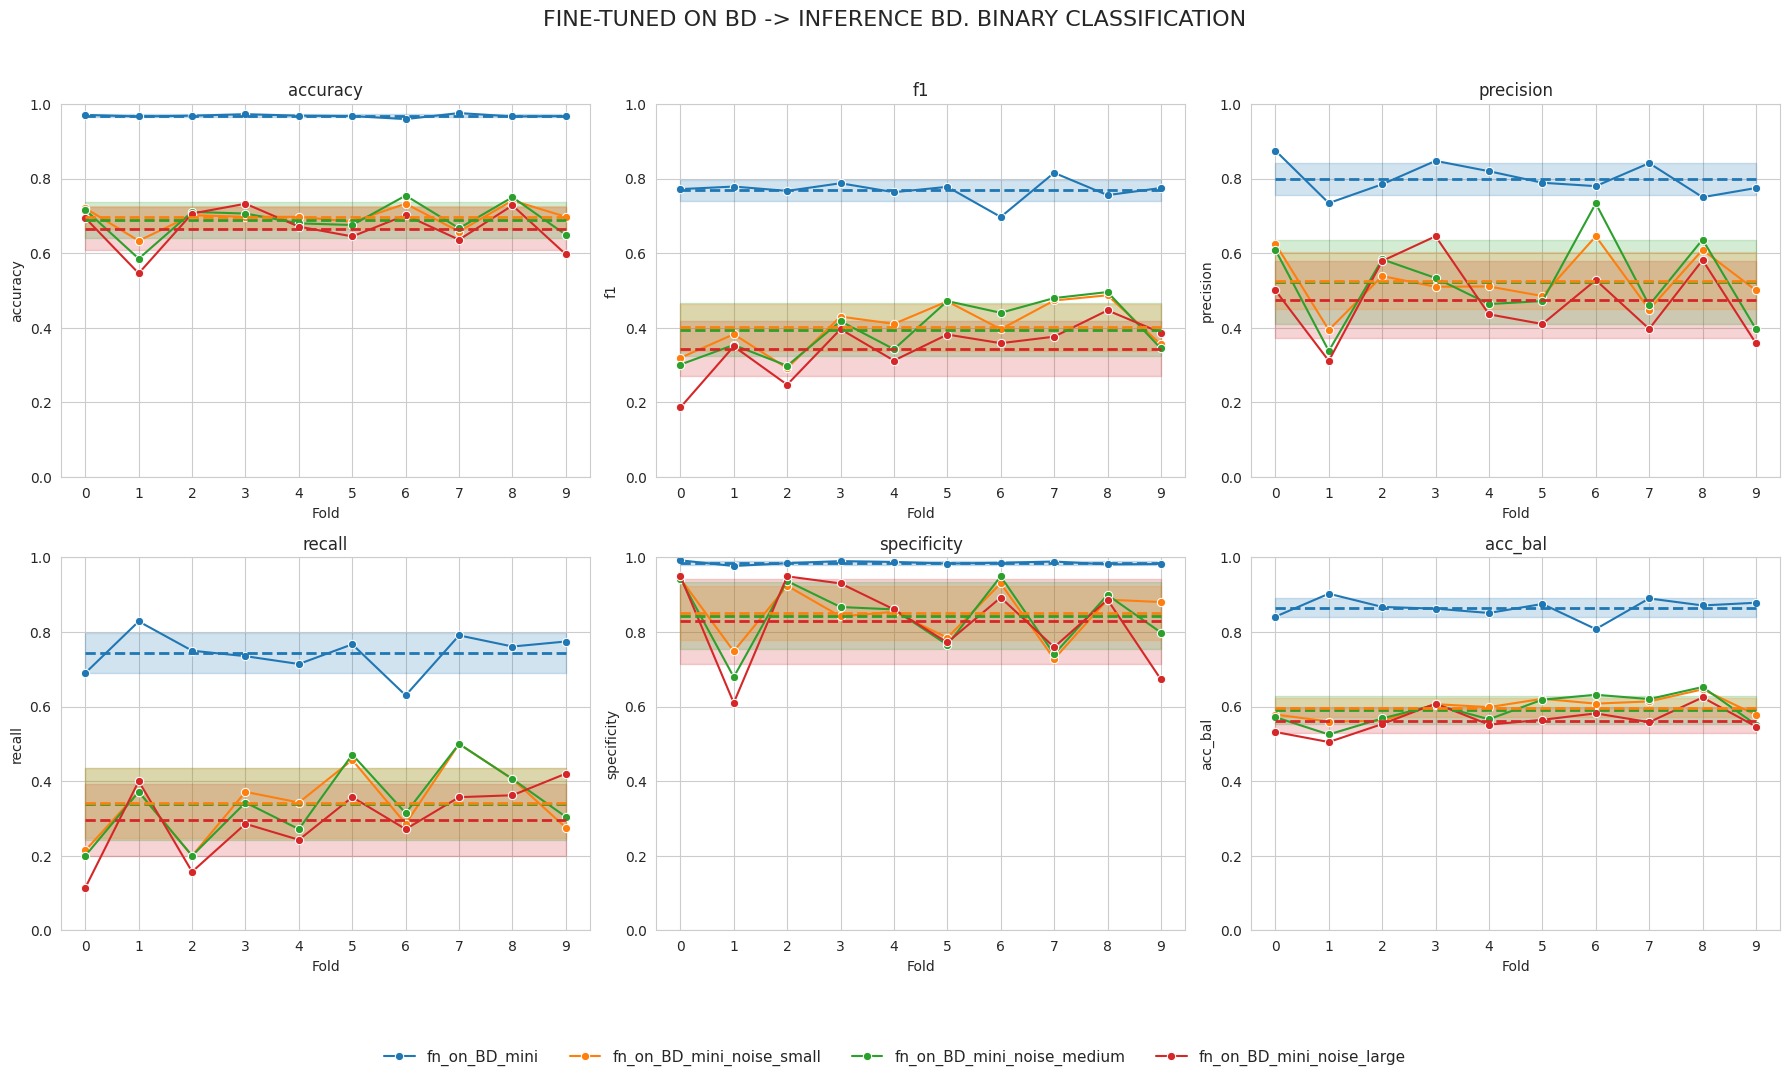

In [78]:
metrics_dict = {
    "fn_on_BD_mini": metrics_BD_01_val_BD,
    "fn_on_BD_mini_noise_small": metrics_BD_01_val_BD_mini_noise_small,
    "fn_on_BD_mini_noise_medium": metrics_BD_01_val_BD_mini_noise_medium,
    "fn_on_BD_mini_noise_large": metrics_BD_01_val_BD_mini_noise_large
}

metric_names = [
    "accuracy", "f1", "precision",
    "recall", "specificity", "acc_bal"
]

dfs = []
for setting, df in metrics_dict.items():
    tmp = df.copy()
    tmp["setting"] = setting
    tmp["fold_id"] = range(len(tmp))
    dfs.append(tmp)

df_all = pd.concat(dfs, ignore_index=True)

palette = sns.color_palette(n_colors=len(metrics_dict))
setting_colors = dict(zip(metrics_dict.keys(), palette))

sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(18, 11))
axes = axes.flatten()

legend_handles, legend_labels = None, None

for i, metric in enumerate(metric_names):
    ax = axes[i]

    show_legend = (i == 0)

    sns.lineplot(
        data=df_all,
        x="fold_id",
        y=metric,
        hue="setting",
        marker="o",
        ax=ax,
        palette=setting_colors,
        legend=show_legend
    )

    if show_legend:
        legend_handles, legend_labels = ax.get_legend_handles_labels()
        ax.legend_.remove()

    for setting, df_setting in df_all.groupby("setting"):
        values = df_setting[metric].values
        mean_val = values.mean()
        std_val = values.std()
        folds = df_setting["fold_id"].values

        color = setting_colors[setting]

        ax.hlines(
            mean_val,
            xmin=folds.min(),
            xmax=folds.max(),
            linestyles="dashed",
            colors=color,
            linewidth=2
        )

        ax.fill_between(
            folds,
            mean_val - std_val,
            mean_val + std_val,
            color=color,
            alpha=0.2
        )

    ax.set_title(metric)
    ax.set_xlabel("Fold")
    ax.set_ylabel(metric)
    ax.set_xticks(np.arange(10))
    ax.set_ylim(0, 1)

fig.legend(
    legend_handles,
    legend_labels,
    loc="lower center",
    ncol=len(metrics_dict),
    frameon=False,
    fontsize=11
)

plt.suptitle(
    "FINE-TUNED ON BD -> INFERENCE BD. BINARY CLASSIFICATION",
    fontsize=16,
    y=0.97
)

plt.tight_layout(rect=[0, 0.08, 1, 0.95])
plt.show()

### FINE-TUNED ON MESSIDOR

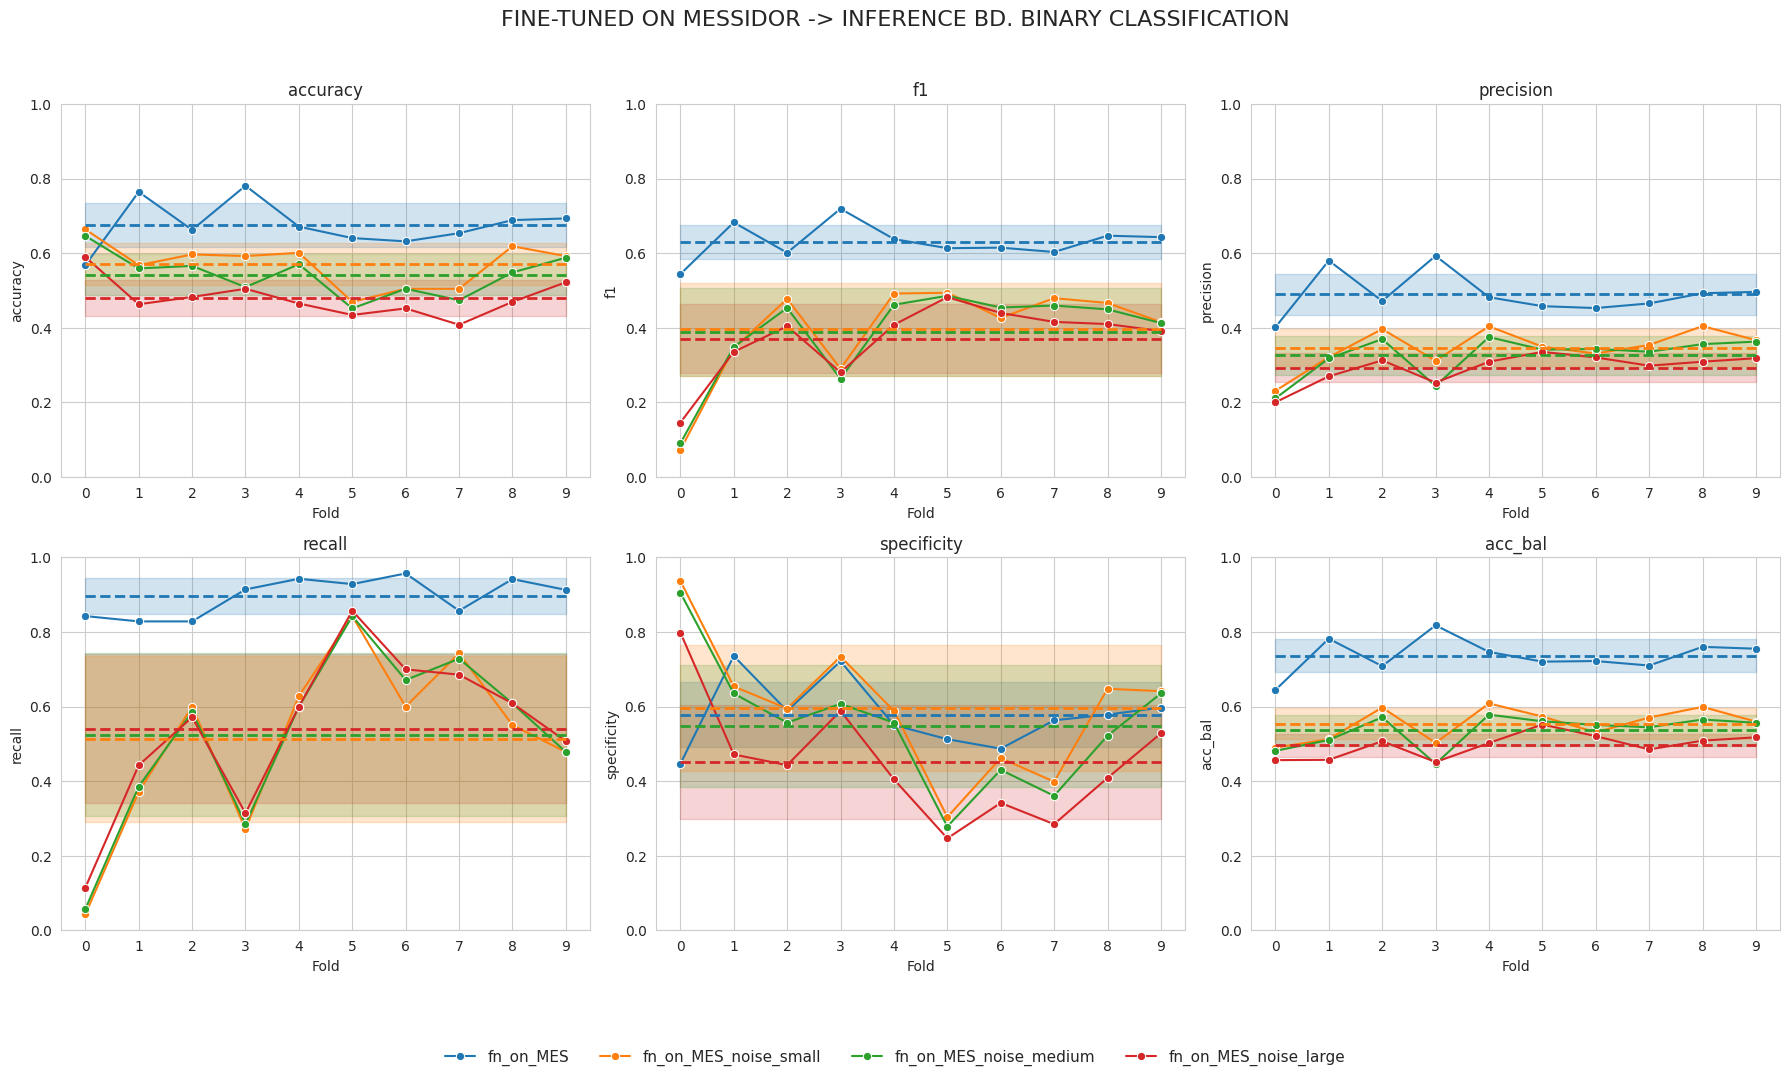

In [79]:
metrics_dict = {
    "fn_on_MES": metrics_MES_01_val_BD_mini,
    "fn_on_MES_noise_small": metrics_01_MES_val_BD_mini_noise_small,
    "fn_on_MES_noise_medium": metrics_01_MES_val_BD_mini_noise_medium,
    "fn_on_MES_noise_large": metrics_01_MES_val_BD_mini_noise_large
}

metric_names = [
    "accuracy", "f1", "precision",
    "recall", "specificity", "acc_bal"
]

dfs = []
for setting, df in metrics_dict.items():
    tmp = df.copy()
    tmp["setting"] = setting
    tmp["fold_id"] = range(len(tmp))
    dfs.append(tmp)

df_all = pd.concat(dfs, ignore_index=True)

palette = sns.color_palette(n_colors=len(metrics_dict))
setting_colors = dict(zip(metrics_dict.keys(), palette))

sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(18, 11))
axes = axes.flatten()

legend_handles, legend_labels = None, None

for i, metric in enumerate(metric_names):
    ax = axes[i]

    show_legend = (i == 0)

    sns.lineplot(
        data=df_all,
        x="fold_id",
        y=metric,
        hue="setting",
        marker="o",
        ax=ax,
        palette=setting_colors,
        legend=show_legend
    )

    if show_legend:
        legend_handles, legend_labels = ax.get_legend_handles_labels()
        ax.legend_.remove()

    for setting, df_setting in df_all.groupby("setting"):
        values = df_setting[metric].values
        mean_val = values.mean()
        std_val = values.std()
        folds = df_setting["fold_id"].values

        color = setting_colors[setting]

        ax.hlines(
            mean_val,
            xmin=folds.min(),
            xmax=folds.max(),
            linestyles="dashed",
            colors=color,
            linewidth=2
        )

        ax.fill_between(
            folds,
            mean_val - std_val,
            mean_val + std_val,
            color=color,
            alpha=0.2
        )

    ax.set_title(metric)
    ax.set_xlabel("Fold")
    ax.set_ylabel(metric)
    ax.set_xticks(np.arange(10))
    ax.set_ylim(0, 1)

fig.legend(
    legend_handles,
    legend_labels,
    loc="lower center",
    ncol=len(metrics_dict),
    frameon=False,
    fontsize=11
)

plt.suptitle(
    "FINE-TUNED ON MESSIDOR -> INFERENCE BD. BINARY CLASSIFICATION",
    fontsize=16,
    y=0.97
)

plt.tight_layout(rect=[0, 0.08, 1, 0.95])
plt.show()

### SUMMARY PLOT

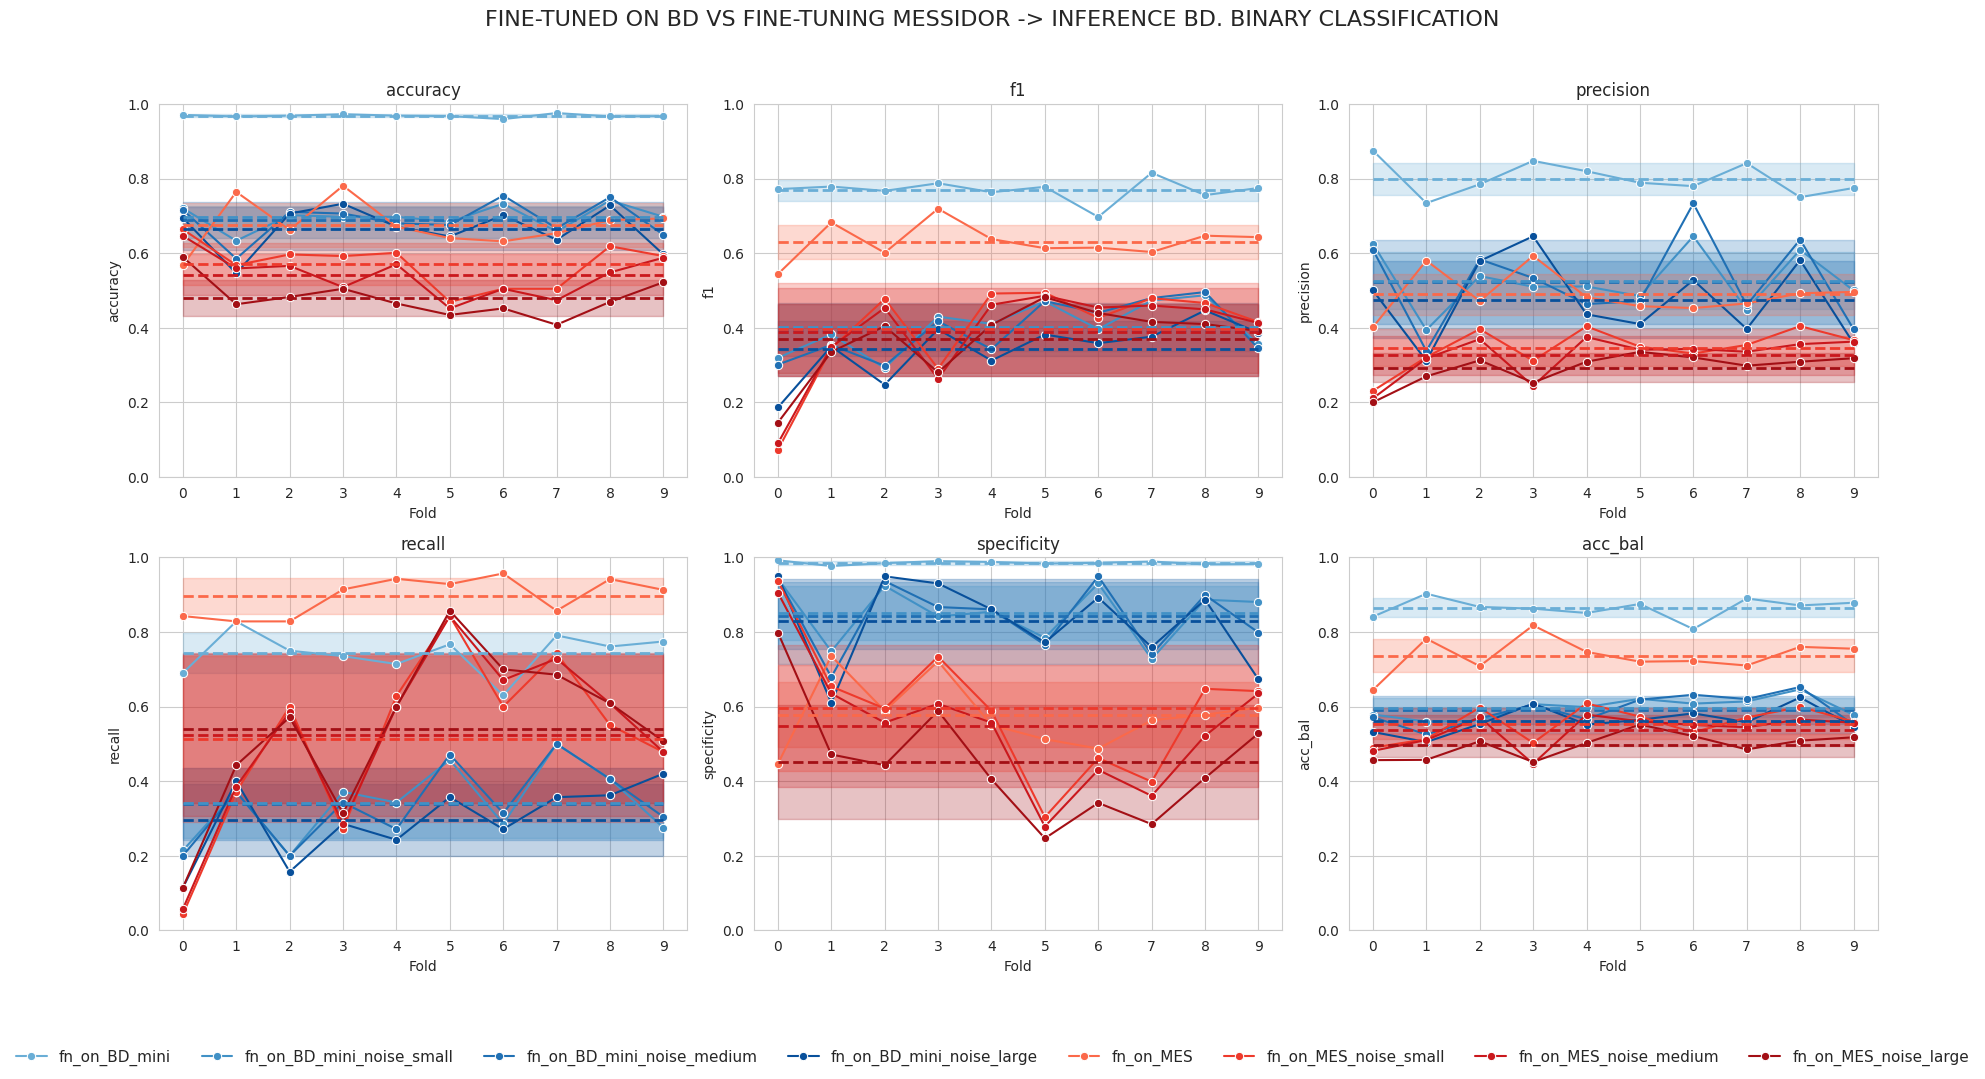

In [80]:
metrics_dict = {
    "fn_on_BD_mini": metrics_BD_01_val_BD,
    "fn_on_BD_mini_noise_small": metrics_BD_01_val_BD_mini_noise_small,
    "fn_on_BD_mini_noise_medium": metrics_BD_01_val_BD_mini_noise_medium,
    "fn_on_BD_mini_noise_large": metrics_BD_01_val_BD_mini_noise_large,
    "fn_on_MES": metrics_MES_01_val_BD_mini,
    "fn_on_MES_noise_small": metrics_01_MES_val_BD_mini_noise_small,
    "fn_on_MES_noise_medium": metrics_01_MES_val_BD_mini_noise_medium,
    "fn_on_MES_noise_large": metrics_01_MES_val_BD_mini_noise_large
}

metric_names = [
    "accuracy", "f1", "precision",
    "recall", "specificity", "acc_bal"
]

dfs = []
for setting, df in metrics_dict.items():
    tmp = df.copy()
    tmp["setting"] = setting
    tmp["fold_id"] = range(len(tmp))
    dfs.append(tmp)

df_all = pd.concat(dfs, ignore_index=True)

bd_colors = sns.color_palette("Blues", 7) 
mes_colors = sns.color_palette("Reds", 7) 

palette = {
    "fn_on_BD_mini": bd_colors[3],
    "fn_on_BD_mini_noise_small": bd_colors[4],
    "fn_on_BD_mini_noise_medium": bd_colors[5],
    "fn_on_BD_mini_noise_large": bd_colors[6],

    "fn_on_MES": mes_colors[3],
    "fn_on_MES_noise_small": mes_colors[4],
    "fn_on_MES_noise_medium": mes_colors[5],
    "fn_on_MES_noise_large": mes_colors[6],
}

sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(18, 11))
axes = axes.flatten()

legend_handles, legend_labels = None, None

for i, metric in enumerate(metric_names):
    ax = axes[i]
    show_legend = (i == 0)

    sns.lineplot(
        data=df_all,
        x="fold_id",
        y=metric,
        hue="setting",
        marker="o",
        ax=ax,
        palette=palette,
        legend=show_legend
    )

    if show_legend:
        legend_handles, legend_labels = ax.get_legend_handles_labels()
        ax.legend_.remove()

    for setting, df_setting in df_all.groupby("setting"):
        values = df_setting[metric].values
        mean_val = values.mean()
        std_val = values.std()
        folds = df_setting["fold_id"].values
        color = palette[setting]

        ax.hlines(
            mean_val,
            xmin=folds.min(),
            xmax=folds.max(),
            linestyles="dashed",
            colors=color,
            linewidth=2
        )

        ax.fill_between(
            folds,
            mean_val - std_val,
            mean_val + std_val,
            color=color,
            alpha=0.25
        )

    ax.set_title(metric)
    ax.set_xlabel("Fold")
    ax.set_ylabel(metric)
    ax.set_xticks(np.arange(10))
    ax.set_ylim(0, 1)

fig.legend(
    legend_handles,
    legend_labels,
    loc="lower center",
    ncol=len(metrics_dict),
    frameon=False,
    fontsize=11
)

plt.suptitle(
    "FINE-TUNED ON BD VS FINE-TUNING MESSIDOR -> INFERENCE BD. BINARY CLASSIFICATION",
    fontsize=16,
    y=0.97
)

plt.tight_layout(rect=[0, 0.08, 1, 0.95])
plt.show()

## MULTICLASS CLASSIFICATION

In [81]:
folder_BD_04_val_BD_mini_noise_small = "RETFound/output_dir/BD_mini_04_val_BD_NOISE_SMALL"
folder_BD_04_val_BD_mini_noise_medium = "RETFound/output_dir/BD_mini_04_val_BD_NOISE_MEDIUM"
folder_BD_04_val_BD_mini_noise_large = "RETFound/output_dir/BD_mini_04_val_BD_NOISE_LARGE"

folder_04_MES_val_BD_mini_noise_small = "RETFound/output_dir/04_MES_val_BD_mini_NOISE_SMALL"
folder_04_MES_val_BD_mini_noise_medium = "RETFound/output_dir/04_MES_val_BD_mini_NOISE_MEDIUM"
folder_04_MES_val_BD_mini_noise_large = "RETFound/output_dir/04_MES_val_BD_mini_NOISE_LARGE"

In [82]:
folds_BD_mini_04_val_BD_mini_noise_small = extract_dfs(folder_BD_04_val_BD_mini_noise_small)
folds_BD_mini_04_val_BD_mini_noise_medium = extract_dfs(folder_BD_04_val_BD_mini_noise_medium)
folds_BD_mini_04_val_BD_mini_noise_large = extract_dfs(folder_BD_04_val_BD_mini_noise_large)

folds_04_MES_val_BD_mini_noise_small = extract_dfs(folder_04_MES_val_BD_mini_noise_small)
folds_04_MES_val_BD_mini_noise_medium = extract_dfs(folder_04_MES_val_BD_mini_noise_medium)
folds_04_MES_val_BD_mini_noise_large = extract_dfs(folder_04_MES_val_BD_mini_noise_large)

In [83]:
metrics_BD_04_val_BD_mini_noise_small = get_metrics_multiclass(folds_BD_mini_04_val_BD_mini_noise_small)
metrics_BD_04_val_BD_mini_noise_medium = get_metrics_multiclass(folds_BD_mini_04_val_BD_mini_noise_medium)
metrics_BD_04_val_BD_mini_noise_large = get_metrics_multiclass(folds_BD_mini_04_val_BD_mini_noise_large)

metrics_04_MES_val_BD_mini_noise_small = get_metrics_multiclass(folds_04_MES_val_BD_mini_noise_small)
metrics_04_MES_val_BD_mini_noise_medium = get_metrics_multiclass(folds_04_MES_val_BD_mini_noise_medium)
metrics_04_MES_val_BD_mini_noise_large = get_metrics_multiclass(folds_04_MES_val_BD_mini_noise_large)

/gpfs01/berens/user/aschaefer/miniconda3/envs/retfound/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/gpfs01/berens/user/aschaefer/miniconda3/envs/retfound/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/gpfs01/berens/user/aschaefer/miniconda3/envs/retfound/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

In [84]:
metrics_BD_mini_04_val_BD = get_metrics_multiclass(folds_BD_mini_04_val_BD)
metrics_MES_04_val_BD_mini = get_metrics_multiclass(folds_MES_04_val_BD_mini)
#print(metrics_BD_mini_04_val_BD)

/gpfs01/berens/user/aschaefer/miniconda3/envs/retfound/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### FINE-TUNED ON Brazilian Dataset

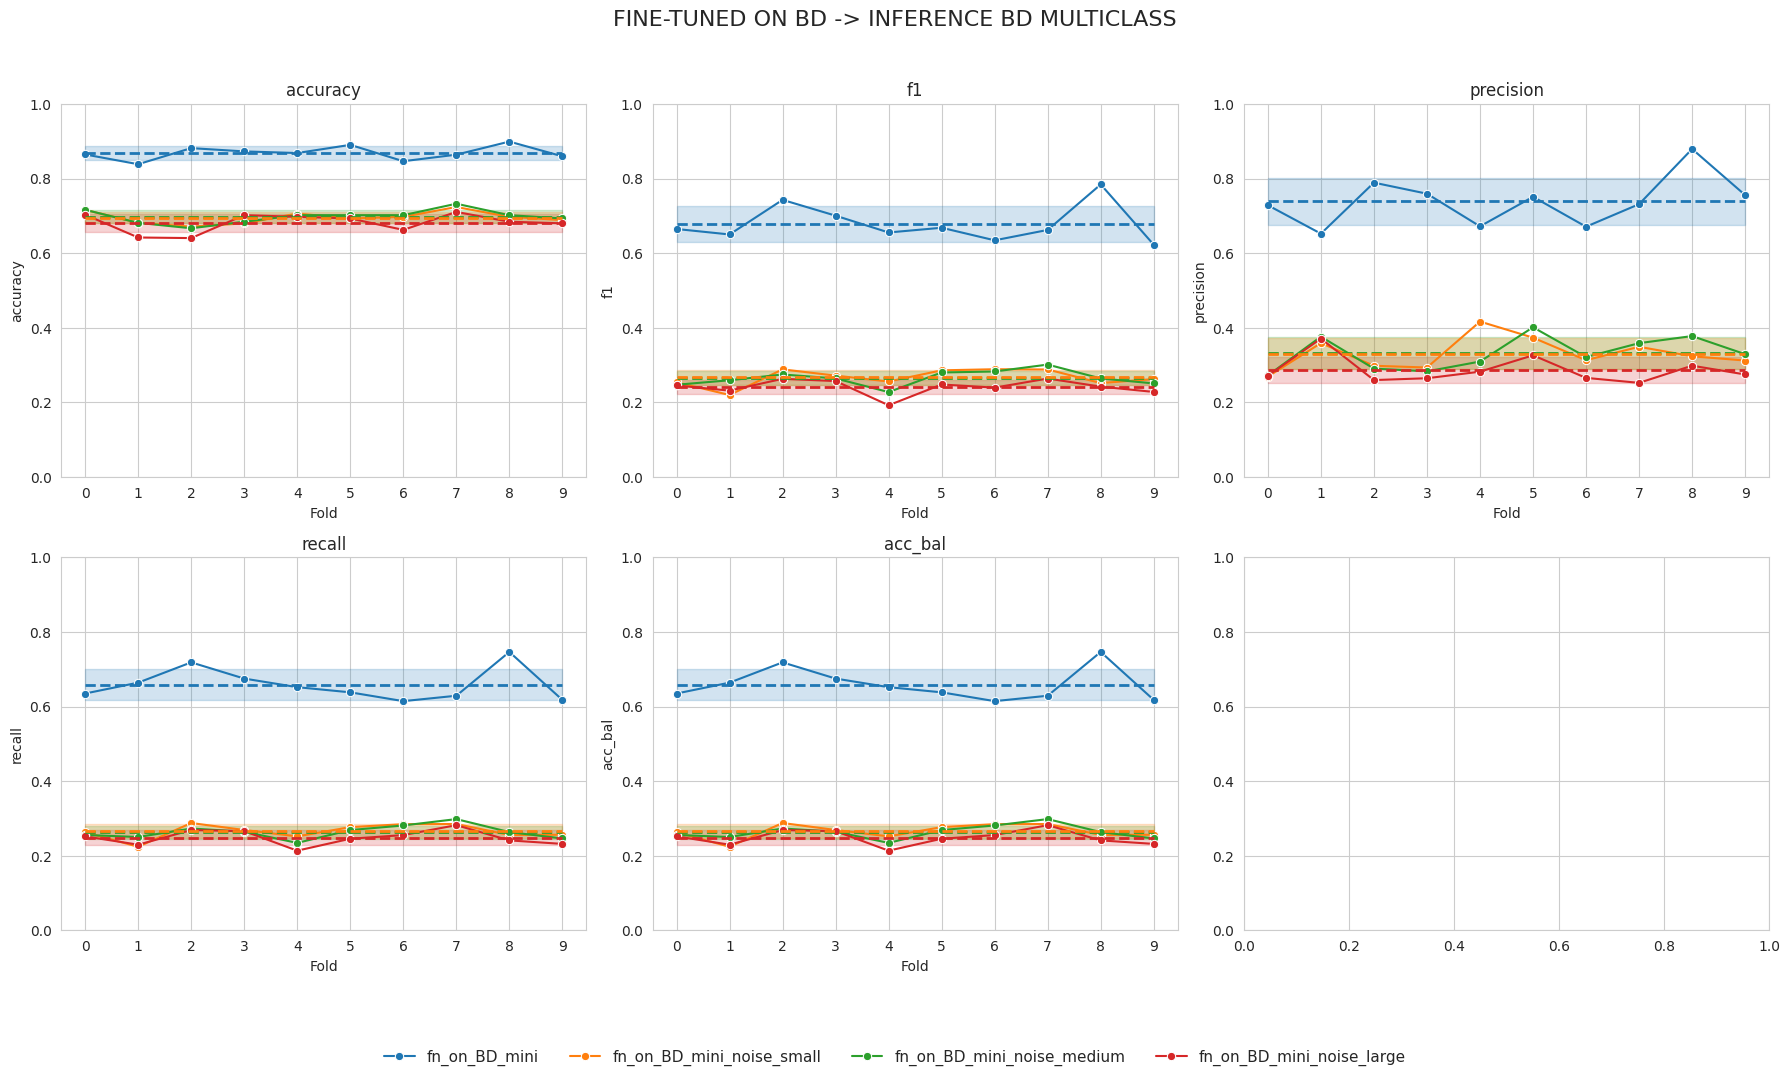

In [85]:
metrics_dict = {
    "fn_on_BD_mini": metrics_BD_mini_04_val_BD,
    "fn_on_BD_mini_noise_small": metrics_BD_04_val_BD_mini_noise_small,
    "fn_on_BD_mini_noise_medium": metrics_BD_04_val_BD_mini_noise_medium,
    "fn_on_BD_mini_noise_large": metrics_BD_04_val_BD_mini_noise_large
}

metric_names = [
    "accuracy", "f1", "precision",
    "recall", "acc_bal"
]

dfs = []
for setting, df in metrics_dict.items():
    tmp = df.copy()
    tmp["setting"] = setting
    tmp["fold_id"] = range(len(tmp))
    dfs.append(tmp)

df_all = pd.concat(dfs, ignore_index=True)

palette = sns.color_palette(n_colors=len(metrics_dict))
setting_colors = dict(zip(metrics_dict.keys(), palette))

sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(18, 11))
axes = axes.flatten()

legend_handles, legend_labels = None, None

for i, metric in enumerate(metric_names):
    ax = axes[i]

    show_legend = (i == 0)

    sns.lineplot(
        data=df_all,
        x="fold_id",
        y=metric,
        hue="setting",
        marker="o",
        ax=ax,
        palette=setting_colors,
        legend=show_legend
    )

    if show_legend:
        legend_handles, legend_labels = ax.get_legend_handles_labels()
        ax.legend_.remove()

    for setting, df_setting in df_all.groupby("setting"):
        values = df_setting[metric].values
        mean_val = values.mean()
        std_val = values.std()
        folds = df_setting["fold_id"].values

        color = setting_colors[setting]

        ax.hlines(
            mean_val,
            xmin=folds.min(),
            xmax=folds.max(),
            linestyles="dashed",
            colors=color,
            linewidth=2
        )


        ax.fill_between(
            folds,
            mean_val - std_val,
            mean_val + std_val,
            color=color,
            alpha=0.2
        )

    ax.set_title(metric)
    ax.set_xlabel("Fold")
    ax.set_ylabel(metric)
    ax.set_xticks(np.arange(10))
    ax.set_ylim(0, 1)

fig.legend(
    legend_handles,
    legend_labels,
    loc="lower center",
    ncol=len(metrics_dict),
    frameon=False,
    fontsize=11
)

plt.suptitle(
    "FINE-TUNED ON BD -> INFERENCE BD MULTICLASS",
    fontsize=16,
    y=0.97
)

plt.tight_layout(rect=[0, 0.08, 1, 0.95])
plt.show()

### FINE-TUNED ON MESSIDOR

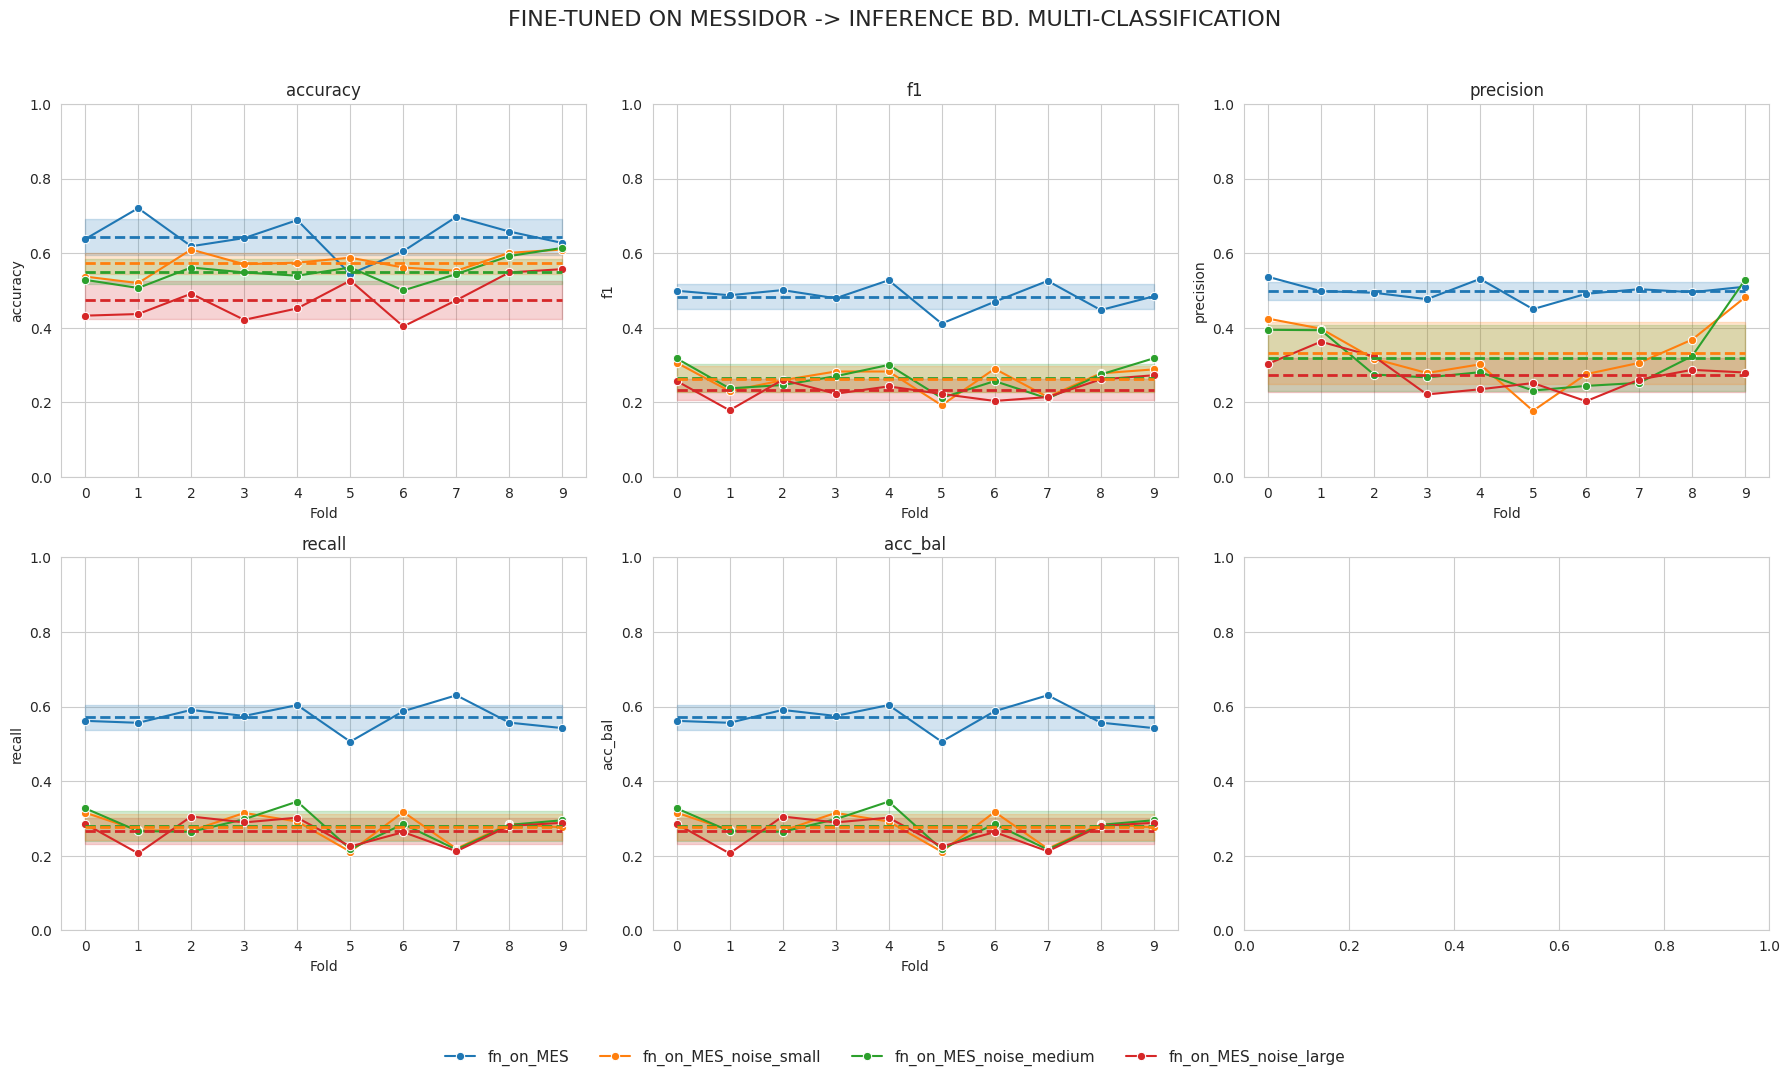

In [86]:
metrics_dict = {
    "fn_on_MES": metrics_MES_04_val_BD_mini,
    "fn_on_MES_noise_small": metrics_04_MES_val_BD_mini_noise_small,
    "fn_on_MES_noise_medium": metrics_04_MES_val_BD_mini_noise_medium,
    "fn_on_MES_noise_large": metrics_04_MES_val_BD_mini_noise_large
}

metric_names = [
    "accuracy", "f1", "precision",
    "recall", "acc_bal"
]

dfs = []
for setting, df in metrics_dict.items():
    tmp = df.copy()
    tmp["setting"] = setting
    tmp["fold_id"] = range(len(tmp))
    dfs.append(tmp)

df_all = pd.concat(dfs, ignore_index=True)

palette = sns.color_palette(n_colors=len(metrics_dict))
setting_colors = dict(zip(metrics_dict.keys(), palette))

sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(18, 11))
axes = axes.flatten()

legend_handles, legend_labels = None, None

for i, metric in enumerate(metric_names):
    ax = axes[i]

    show_legend = (i == 0)

    sns.lineplot(
        data=df_all,
        x="fold_id",
        y=metric,
        hue="setting",
        marker="o",
        ax=ax,
        palette=setting_colors,
        legend=show_legend
    )

    if show_legend:
        legend_handles, legend_labels = ax.get_legend_handles_labels()
        ax.legend_.remove()

    for setting, df_setting in df_all.groupby("setting"):
        values = df_setting[metric].values
        mean_val = values.mean()
        std_val = values.std()
        folds = df_setting["fold_id"].values

        color = setting_colors[setting]

        ax.hlines(
            mean_val,
            xmin=folds.min(),
            xmax=folds.max(),
            linestyles="dashed",
            colors=color,
            linewidth=2
        )

        ax.fill_between(
            folds,
            mean_val - std_val,
            mean_val + std_val,
            color=color,
            alpha=0.2
        )

    ax.set_title(metric)
    ax.set_xlabel("Fold")
    ax.set_ylabel(metric)
    ax.set_xticks(np.arange(10))
    ax.set_ylim(0, 1)

fig.legend(
    legend_handles,
    legend_labels,
    loc="lower center",
    ncol=len(metrics_dict),
    frameon=False,
    fontsize=11
)

plt.suptitle(
    "FINE-TUNED ON MESSIDOR -> INFERENCE BD. MULTI-CLASSIFICATION",
    fontsize=16,
    y=0.97
)

plt.tight_layout(rect=[0, 0.08, 1, 0.95])
plt.show()

### SUMMARY PLOT

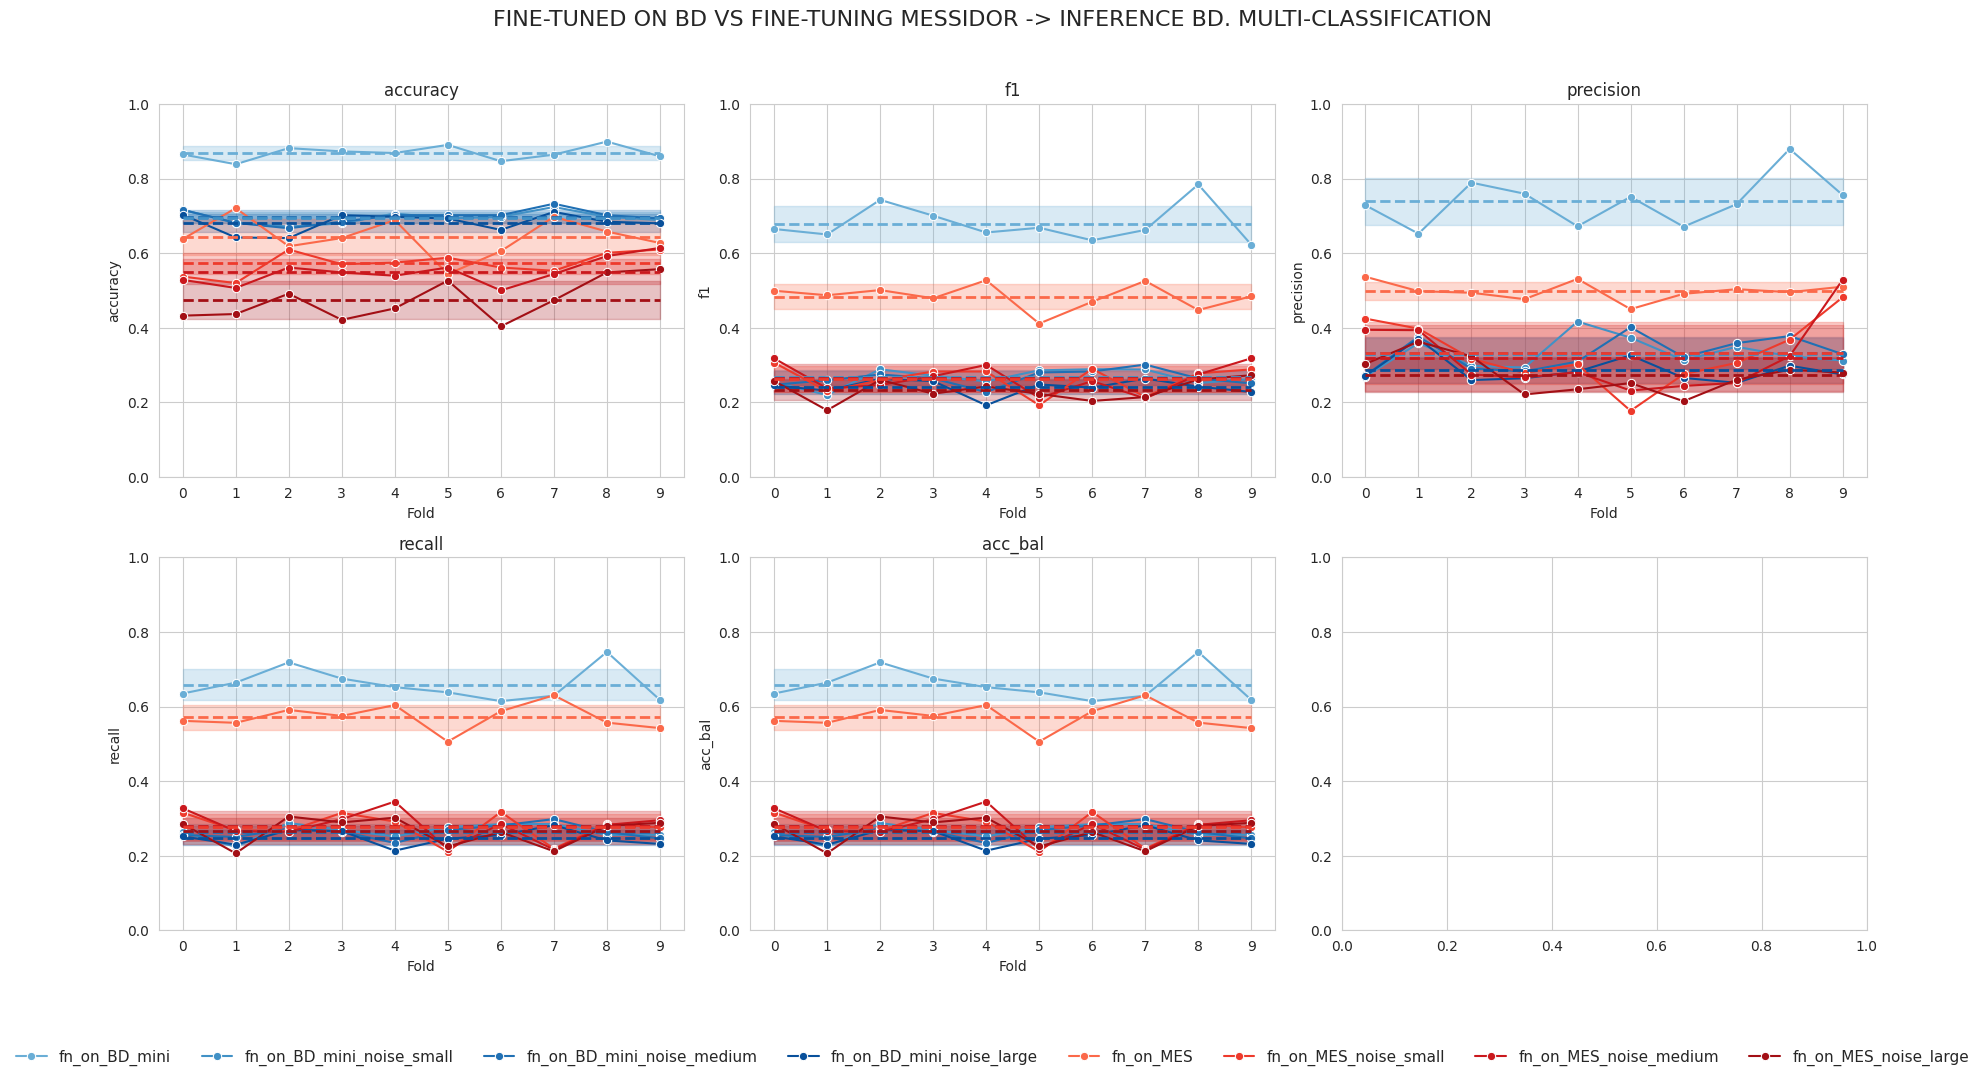

In [87]:
metrics_dict = {
    "fn_on_BD_mini": metrics_BD_mini_04_val_BD,
    "fn_on_BD_mini_noise_small": metrics_BD_04_val_BD_mini_noise_small,
    "fn_on_BD_mini_noise_medium": metrics_BD_04_val_BD_mini_noise_medium,
    "fn_on_BD_mini_noise_large": metrics_BD_04_val_BD_mini_noise_large,
    "fn_on_MES": metrics_MES_04_val_BD_mini,
    "fn_on_MES_noise_small": metrics_04_MES_val_BD_mini_noise_small,
    "fn_on_MES_noise_medium": metrics_04_MES_val_BD_mini_noise_medium,
    "fn_on_MES_noise_large": metrics_04_MES_val_BD_mini_noise_large
}

metric_names = [
    "accuracy", "f1", "precision",
    "recall", "acc_bal"
]

dfs = []
for setting, df in metrics_dict.items():
    tmp = df.copy()
    tmp["setting"] = setting
    tmp["fold_id"] = range(len(tmp))
    dfs.append(tmp)

df_all = pd.concat(dfs, ignore_index=True)

bd_colors = sns.color_palette("Blues", 7)
mes_colors = sns.color_palette("Reds", 7) 

palette = {
    "fn_on_BD_mini": bd_colors[3],
    "fn_on_BD_mini_noise_small": bd_colors[4],
    "fn_on_BD_mini_noise_medium": bd_colors[5],
    "fn_on_BD_mini_noise_large": bd_colors[6],

    "fn_on_MES": mes_colors[3],
    "fn_on_MES_noise_small": mes_colors[4],
    "fn_on_MES_noise_medium": mes_colors[5],
    "fn_on_MES_noise_large": mes_colors[6],
}

sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(18, 11))
axes = axes.flatten()

legend_handles, legend_labels = None, None

for i, metric in enumerate(metric_names):
    ax = axes[i]
    show_legend = (i == 0)

    sns.lineplot(
        data=df_all,
        x="fold_id",
        y=metric,
        hue="setting",
        marker="o",
        ax=ax,
        palette=palette,
        legend=show_legend
    )

    if show_legend:
        legend_handles, legend_labels = ax.get_legend_handles_labels()
        ax.legend_.remove()

    for setting, df_setting in df_all.groupby("setting"):
        values = df_setting[metric].values
        mean_val = values.mean()
        std_val = values.std()
        folds = df_setting["fold_id"].values
        color = palette[setting]

        ax.hlines(
            mean_val,
            xmin=folds.min(),
            xmax=folds.max(),
            linestyles="dashed",
            colors=color,
            linewidth=2
        )

        ax.fill_between(
            folds,
            mean_val - std_val,
            mean_val + std_val,
            color=color,
            alpha=0.25
        )

    ax.set_title(metric)
    ax.set_xlabel("Fold")
    ax.set_ylabel(metric)
    ax.set_xticks(np.arange(10))
    ax.set_ylim(0, 1)

fig.legend(
    legend_handles,
    legend_labels,
    loc="lower center",
    ncol=len(metrics_dict),
    frameon=False,
    fontsize=11
)

plt.suptitle(
    "FINE-TUNED ON BD VS FINE-TUNING MESSIDOR -> INFERENCE BD. MULTI-CLASSIFICATION",
    fontsize=16,
    y=0.97
)

plt.tight_layout(rect=[0, 0.08, 1, 0.95])
plt.show()

# COMPARE BINARY AND MULTICLASS CLASSIFICATION

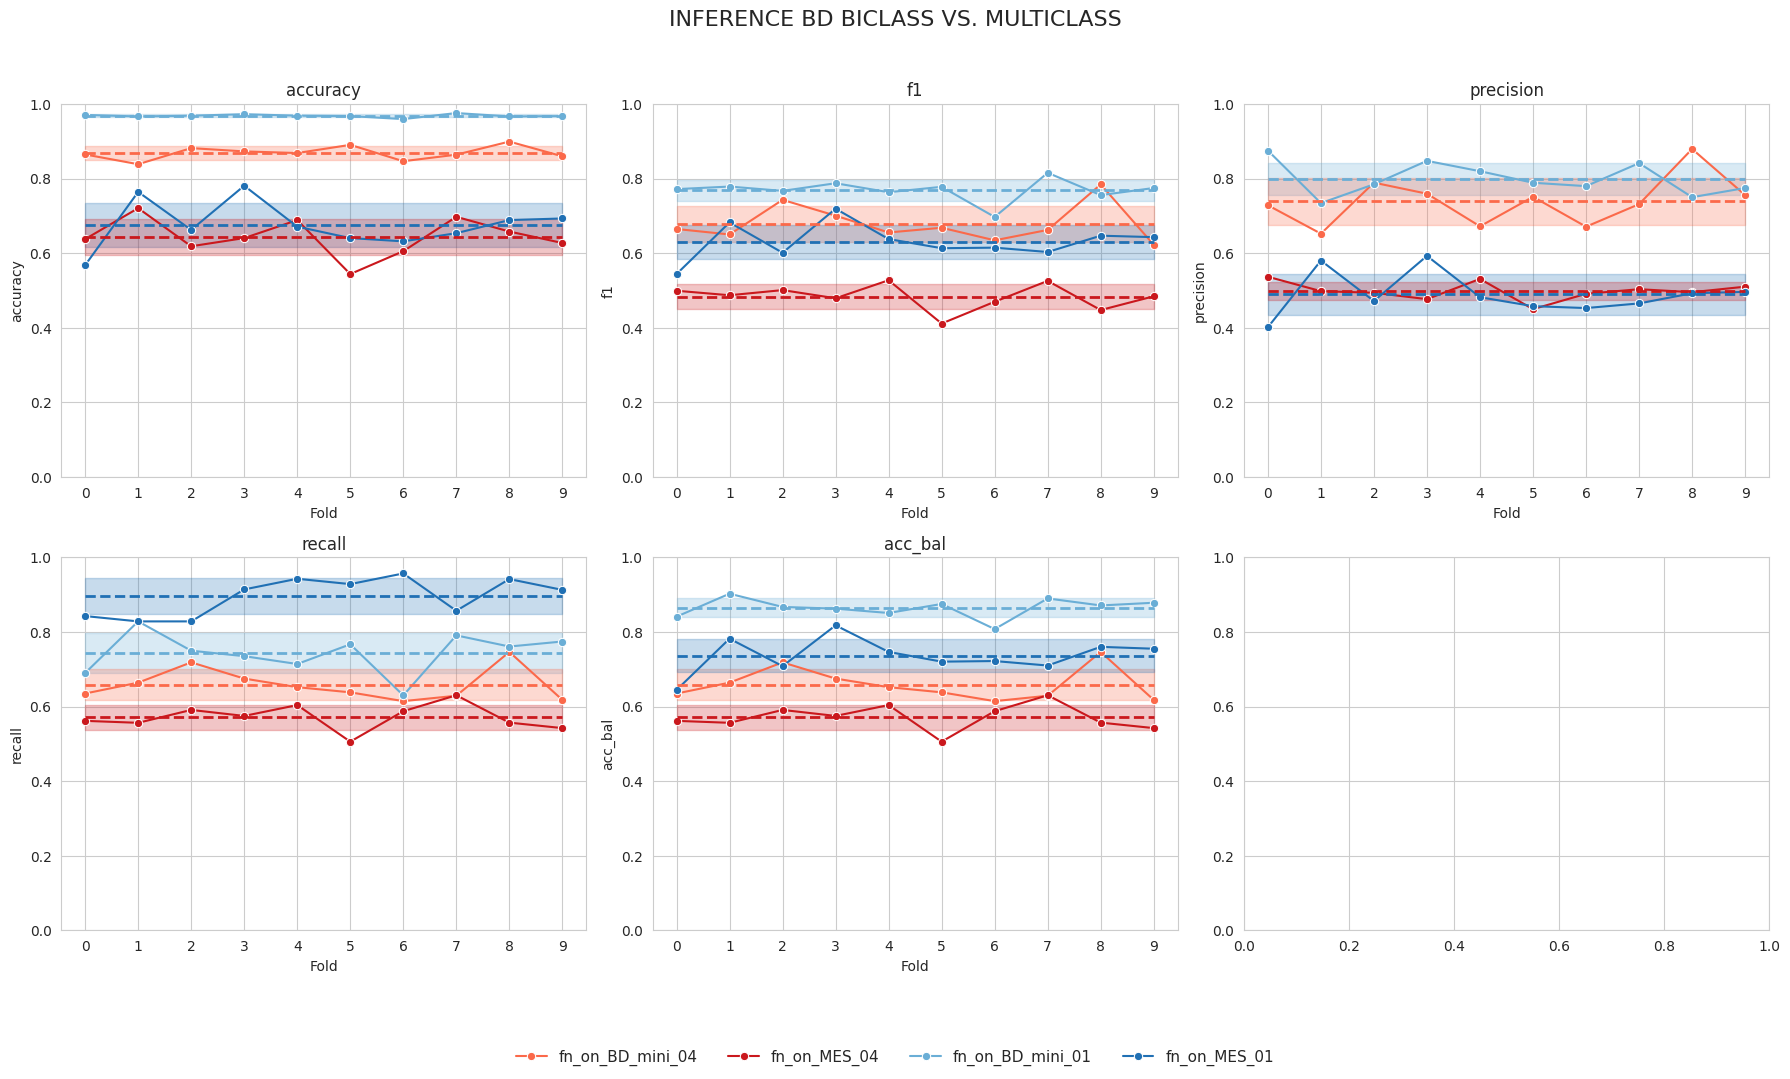

In [88]:
metrics_dict = {
    "fn_on_BD_mini_04": metrics_BD_mini_04_val_BD,
    "fn_on_MES_04": metrics_MES_04_val_BD_mini,
    "fn_on_BD_mini_01": metrics_BD_01_val_BD,
    "fn_on_MES_01": metrics_MES_01_val_BD_mini,

}

metric_names = [
    "accuracy", "f1", "precision",
    "recall", "acc_bal"
]

dfs = []
for setting, df in metrics_dict.items():
    tmp = df.copy()
    tmp["setting"] = setting
    tmp["fold_id"] = range(len(tmp))
    dfs.append(tmp)

df_all = pd.concat(dfs, ignore_index=True)

bd_colors = sns.color_palette("Blues", 7) 
mes_colors = sns.color_palette("Reds", 7)

palette = {
    "fn_on_BD_mini_01": bd_colors[3],
    "fn_on_MES_01": bd_colors[5],

    "fn_on_BD_mini_04": mes_colors[3],
    "fn_on_MES_04": mes_colors[5],
}

sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(18, 11))
axes = axes.flatten()

legend_handles, legend_labels = None, None

for i, metric in enumerate(metric_names):
    ax = axes[i]
    show_legend = (i == 0)

    sns.lineplot(
        data=df_all,
        x="fold_id",
        y=metric,
        hue="setting",
        marker="o",
        ax=ax,
        palette=palette,
        legend=show_legend
    )

    if show_legend:
        legend_handles, legend_labels = ax.get_legend_handles_labels()
        ax.legend_.remove()

    for setting, df_setting in df_all.groupby("setting"):
        values = df_setting[metric].values
        mean_val = values.mean()
        std_val = values.std()
        folds = df_setting["fold_id"].values
        color = palette[setting]

        ax.hlines(
            mean_val,
            xmin=folds.min(),
            xmax=folds.max(),
            linestyles="dashed",
            colors=color,
            linewidth=2
        )

        ax.fill_between(
            folds,
            mean_val - std_val,
            mean_val + std_val,
            color=color,
            alpha=0.25
        )

    ax.set_title(metric)
    ax.set_xlabel("Fold")
    ax.set_ylabel(metric)
    ax.set_xticks(np.arange(10))
    ax.set_ylim(0, 1)

fig.legend(
    legend_handles,
    legend_labels,
    loc="lower center",
    ncol=len(metrics_dict),
    frameon=False,
    fontsize=11
)

plt.suptitle(
    "INFERENCE BD BICLASS VS. MULTICLASS",
    fontsize=16,
    y=0.97
)

plt.tight_layout(rect=[0, 0.08, 1, 0.95])
plt.show()